----
# Laboratorium 9 - Kodowanie transformatowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy` oraz `matplotlib`.
### 0.2. Transformata 2D-DCT
### 0.3  Kwantyzacja  
### 0.4  Kodowanie transformatowe

## Przed przystąpieniem do ćwiczenia prosze się upewnić, aby w lokalizacji pliku .ipynb (z instrukcją) znajdował się równiez plik xTransformCoding.py !!!

Literatura:
- M. Domański, Obraz cyfrowy, Wydawnictwo  WKŁ, Warszawa 2011
- D. Karwowski: Zrozumieć kompresję, Poznań 2019

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import imageio
import math 
from scipy.fft import dctn,idctn

### Zadanie A  

- Wyznacz dwuwymiarową transformatę kosinusową (2D-DCT) całego obrazu (lena lub boats).  
- Następnie, z uzyskanych współczynników transformaty, zrekostruuj obraz (transformacja odwrotna) - pamiętaj o odpowiednim typie danych (zaokrąglenie i rzutowanie na `uint8`).  
- Porównaj, czy obraz zrekonstruowany jest identyczny z oryginalnym.  
- Następnie, zrekostruuj obraz, ale tylko z ograniczonej liczby współczynników (wyzeruj wyższe składowe harmoniczne przed transformacją odwrotną).  
- Wyświetl obraz oryginalny, zrekonstruowany oraz zrekonstuowany z ograniczonej liczby współczynników transformaty.   
- Powtórz operacje dla innego obrazu testowego i różnej liczby współczynników DCT wykorzystanych do rekonstrukcji obrazu.  

#### Wskazówka
Użyj funkcji `sp.fft.dctn` oraz `sp.fft.idctn` z parametrem $norm='ortho'$.

/tmp/ipykernel_19826/1400475071.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figDCT.show()


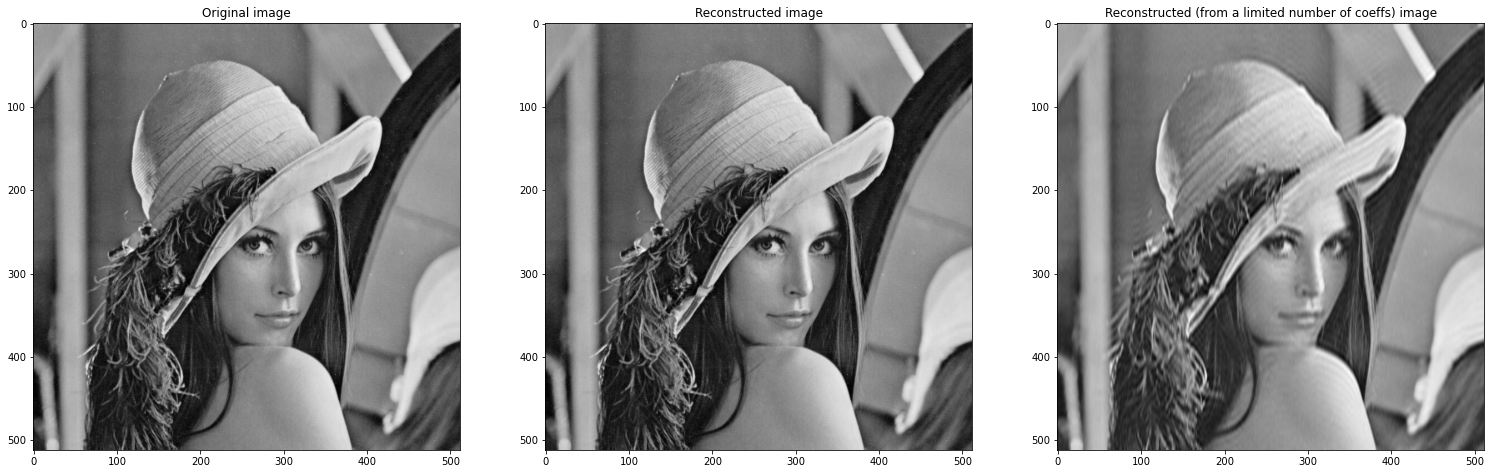

In [18]:
#read images
lena=imageio.imread("lena.png")
boat=imageio.imread("boats.png")
# Forward 2D-DCT
lena_2D=sp.fft.dctn(lena, norm='ortho')
boat_2D=sp.fft.dctn(boat, norm='ortho')
# Inverse 2D-DCT
lena_2Did8=np.round(sp.fft.idctn(lena_2D,norm='ortho')).astype(np.uint8)
# Rounding and converstion to uint8
lena_2D8=np.round(lena_2D).astype(np.uint8)
boat_2D8=np.round(boat_2D).astype(np.uint8)

#compare results - sample-wise (np.allclose, np.amax)
diff_lena=lena-lena_2D8
diff_boat=boat-boat_2D8
# Reconstruction from a limited number of coefficients
left_coeffs=100
lena_2D[left_coeffs:,:]=0
boat_2D[:,left_coeffs:]=0
#idctn
lena_2Di8=np.round(sp.fft.idctn(lena_2D,norm='ortho')).astype(np.uint8)
boat_2Di8=np.round(sp.fft.idctn(boat,norm='ortho')).astype(np.uint8)


figDCT, axsDCT = plt.subplots(1, 3, figsize=[26, 14])
axsDCT[0].imshow(  lena, cmap=plt.cm.gray)
axsDCT[0].set_title("Original image")
axsDCT[1].imshow(      lena_2Did8  , cmap=plt.cm.gray)
axsDCT[1].set_title("Reconstructed image")
axsDCT[2].imshow(        lena_2Di8   , cmap=plt.cm.gray)
axsDCT[2].set_title("Reconstructed (from a limited number of coeffs) image")
figDCT.show()

### Zadanie B  

- Wyznacz dwuwymiarową transformatę kosinusową (2D-DCT) całego obrazu w blokach 8x8 (lena lub boats).  
- Następnie, z uzyskanych współczynników transformaty, zrekostruuj obraz (transformacja odwrotna w blokach 8x8) - pamiętaj o odpowiednim typie danych (zaokrąglenie i rzutowanie na `uint8`).  
- Porównaj, czy obraz zrekonstruowany jest identyczny z oryginalnym.  
  

#### Wskazówka
Użyj funkcji zdefiniowanych poniżej.

----

/tmp/ipykernel_19826/714498647.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figDCT.show()


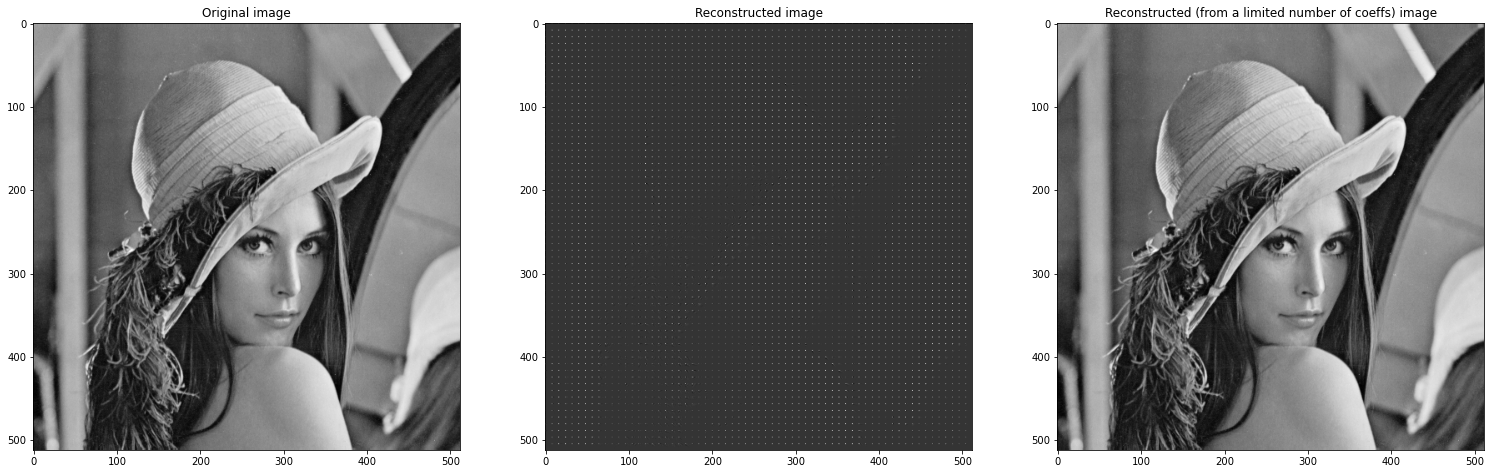

In [20]:

def dct_in_blocks(M, blk_size=(8,8)):
    outTransformImage = np.zeros_like(M).astype(np.float64)
    for i in range(0, M.shape[0], blk_size[0]):
        for j in range(0, M.shape[1], blk_size[1]):
            max_ndx = (min(i+blk_size[0], M.shape[0]),
                       min(j+blk_size[1], M.shape[1]))
            outTransformImage[i:max_ndx[0], j:max_ndx[1]]=sp.fft.dctn(M[i:max_ndx[0], j:max_ndx[1]], norm='ortho')
    return outTransformImage

def idct_in_blocks(M, blk_size=(8,8)):
    outInvTransformImage = np.zeros_like(M)
    for i in range(0, M.shape[0], blk_size[0]):
        for j in range(0, M.shape[1], blk_size[1]):
            max_ndx = (min(i+blk_size[0], M.shape[0]),
                       min(j+blk_size[1], M.shape[1]))
            outInvTransformImage[i:max_ndx[0], j:max_ndx[1]]=sp.fft.idctn(M[i:max_ndx[0], j:max_ndx[1]], norm='ortho')
    return outInvTransformImage

# Forward 2D-DCT in blocks
lena_block_dct = dct_in_blocks(lena)
# Inverse 2D-DCT in blocks
lena_block_inverse = idct_in_blocks(lena_block_dct)
# Rounding and converstion to uint8
lena_2D8=np.round(lena_block_inverse).astype(np.uint8)
#compare results - sample-wise
figDCT, axsDCT = plt.subplots(1, 3, figsize=[26, 14])
axsDCT[0].imshow(lena, cmap=plt.cm.gray)
axsDCT[0].set_title("Original image")
axsDCT[1].imshow(lena_block_dct, cmap=plt.cm.gray)
axsDCT[1].set_title("Reconstructed image")
axsDCT[2].imshow(lena_2D8, cmap=plt.cm.gray)
axsDCT[2].set_title("Reconstructed (from a limited number of coeffs) image")
figDCT.show()


### Zadanie C  

- Wybierz pojedynczy blok transformaty (`take_block`) i wyświetl rozkład współczynników transformaty za pomocą funkcji `plot_block` jako wykres 3D. Który współczynnik transformaty jest największy? Wyjaśnij dlaczego (por. wzór na transformatę kosinusową)?

- Porównaj bloki transformaty DCT z różnych fragmentów obrazu. Czy wszystkie bloki są takie same? Jeśli nie, to czym się różnią?
Porównaj blok transformaty z odpowiadającym mu blokiem obrazu. Jaki jest związek rozkładu amplitud współczynników transformaty z treścią obrazu?  

- Narysuj rozkład współczynników transformaty dla następujących fragmentów obrazu:  
-- obszar gładki,  
-- obszar z pionowymi krawędziami,  
-- obszar z poziomymi krawędziami.  

#### Wskazówka
Aby lepiej uwidocznić rozkład współczynników, przed wyświetleniem bloku transformaty wyzeruj współczynnik DC.


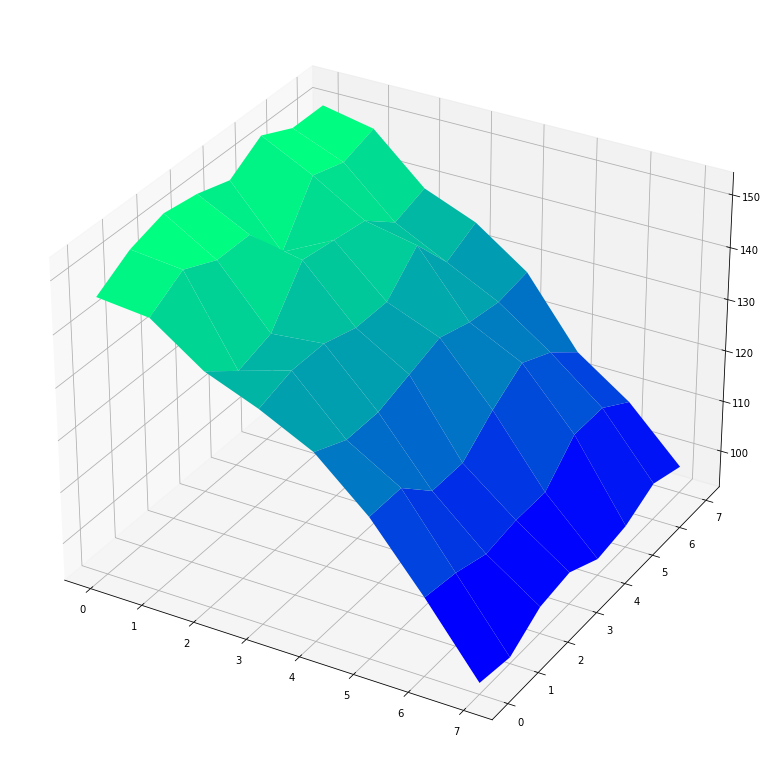

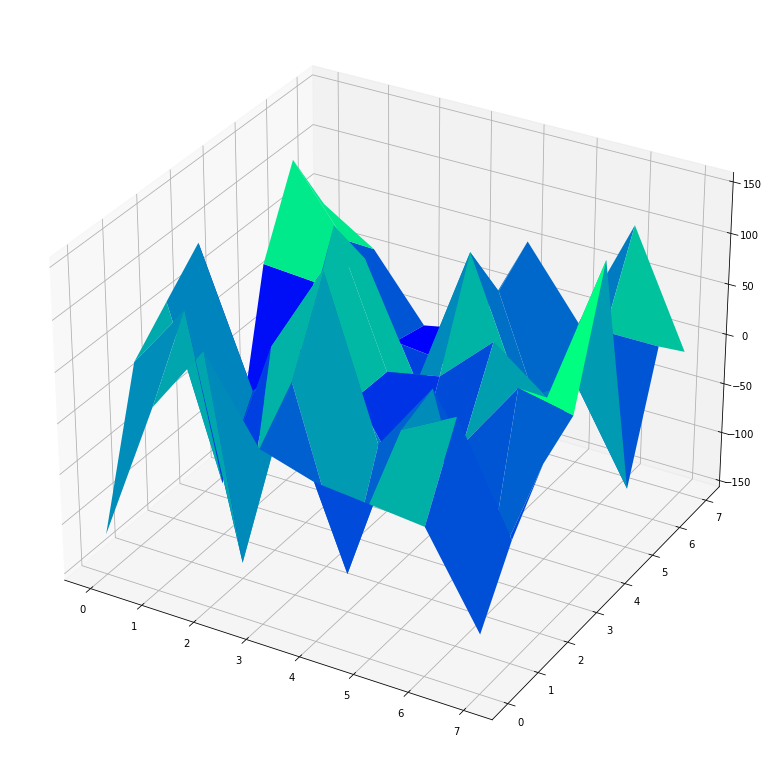

In [27]:
def take_block(A, block_size=(8, 8), block_idx=(0,0)):
    retblock= A[block_size[0]*block_idx[0]:block_size[0]*(block_idx[0]+1),block_size[1]*block_idx[1]:block_size[1]*(block_idx[1]+1)]
    return retblock

def plot_block(A, block_size=(8, 8)):
    fig = plt.figure(figsize=[14, 14])
    ax = plt.axes(projection='3d')

    _x = np.arange(0,block_size[0],1)
    _y = np.arange(0,block_size[1],1)

    _xx, _yy = np.meshgrid(_x, _y)
    ax.plot_surface(_xx, _yy, A,rstride=1, cstride=1, cmap='winter', edgecolor='none')

block = [7, 7] # ustawiamy block gdzie spowdziewamy się krawędzi, np. włosy
# Forward 2D-DCT in blocks
lena_block = take_block(lena, block_idx=block)
lena_dct_block=take_block(lena_2D, block_idx=block)
# Take single block from image and from coefficients

# Plot block of image and block of coefficients
plot_block(lena_block)
plot_block(lena_dct_block)

### Zadanie D  

- Wyznacz wartość średnią modułów współczynników transformaty w bloku transformaty za pomocą funkcji `meanblock()`. Jak kształtują się średnie wartości modułów współczynników transformaty?  

#### Wskazówka
Aby lepiej uwidocznić rozkład współczynników, przed wyświetleniem bloku transformaty wyzeruj współczynnik DC.

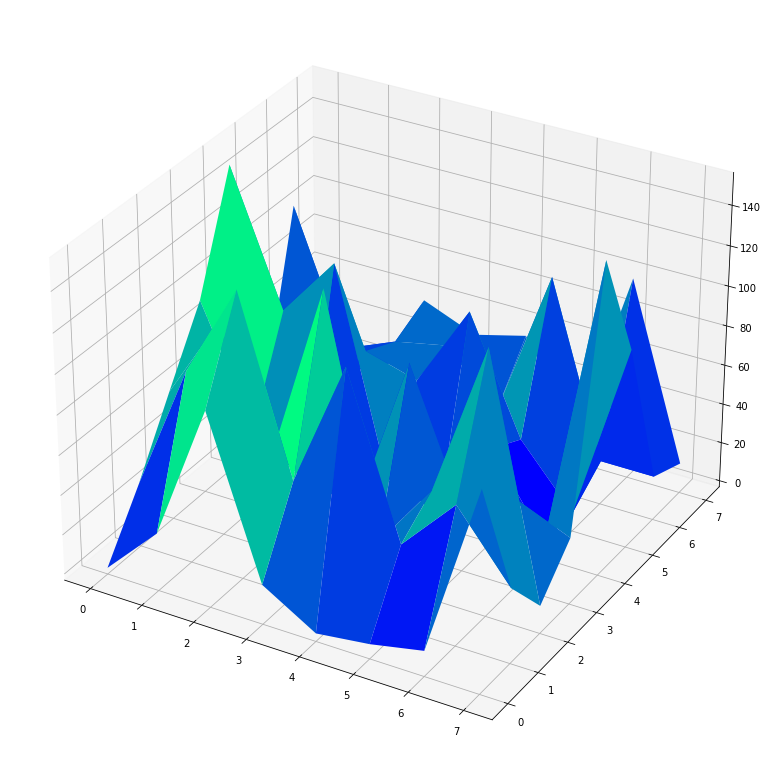

In [32]:
def meanblock(M, blk_size=(8,8)):
    meanblock = np.zeros(blk_size).astype(np.float64)
    for i in range(0, M.shape[0], blk_size[0]):
        for j in range(0, M.shape[1], blk_size[1]):
            max_ndx = (min(i+blk_size[0], M.shape[0]),
                       min(j+blk_size[1], M.shape[1]))
            meanblock=meanblock + np.abs(M[i:max_ndx[0], j:max_ndx[1]])
    meanblock=meanblock/((M.shape[0]/blk_size[0])*(M.shape[1]/blk_size[1]))
    return meanblock

# Forward 2D-DCT in blocks
lena_mean_block = meanblock(lena_dct_block)
lena_mean_block[0,0] = 0
# Block with coefficients mean values
plot_block(lena_mean_block)

### Zadanie E  

- Dokonaj kwantyzacji współczynników transformaty wyznaczonych w blokach 8x8 przy pomocy funkcji `blockquant` z wybraną wartością parametru kwantyzacji – $q$ (pomiędzy 10 a 200).  
- Porównaj wybrane bloki skwantowanych współczynników transformaty z odpowiadającymi im blokami przed kwantyzacją.  
- Wyznacz wartość średnią modułów współczynników transformaty w bloku transformaty za pomocą funkcji `meanblock` po kwantyzacji. Jak zmienił się średni rozkład współczynników transformaty po kwantyzacji?  
- W celu ułatwienia obserwacji można wykorzystać reorganizację obu bloków współczynników transformaty funkcją zigzag()  
- Powtórz operacje dla różnych wartości współczynnika $q$: 10,30,50,70,100.

#### Wskazówka
Aby lepiej uwidocznić rozkład współczynników, przed wyświetleniem bloku transformaty wyzeruj współczynnik DC.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

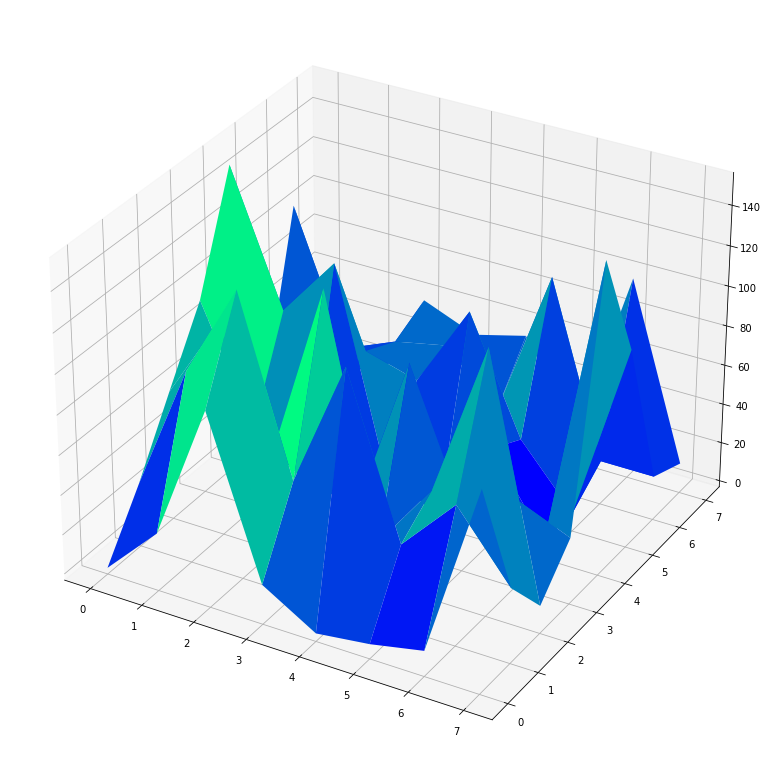

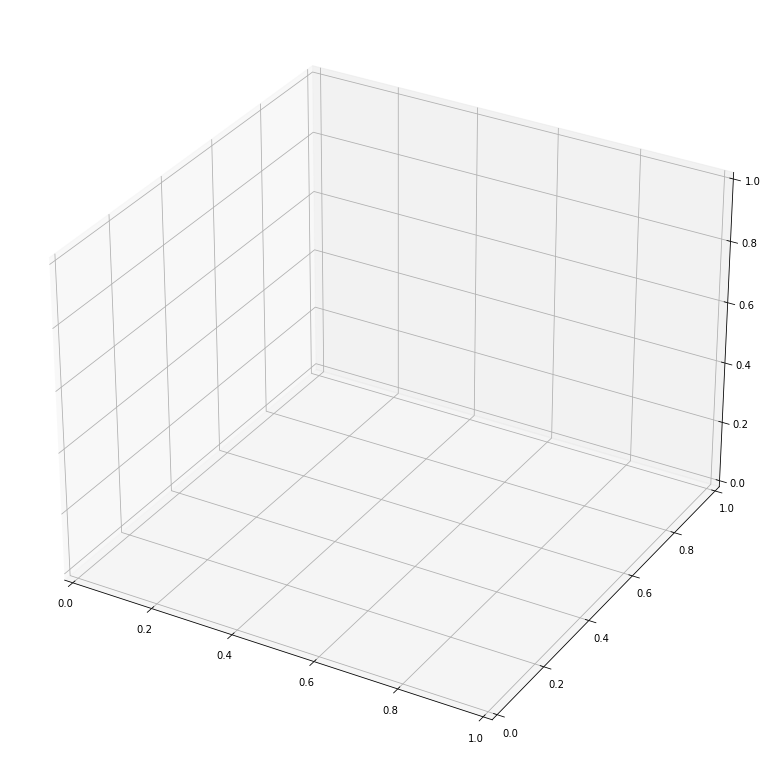

In [34]:

def blockquant(M, blk_size=(8,8), q=10):
    outQuantImage = np.zeros_like(M)
    outQuantImage = (M/q).round()
    outQuantImage = outQuantImage*q
    return outQuantImage

def zigzag(inputBlock) :
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = inputBlock.shape[0]-1
    hmax = inputBlock.shape[1]-1

    i = 0

    output = np.zeros(((vmax+1) * (hmax+1),1))
    #----------------------------------

    while ((v <= vmax) and (h <= hmax)) :
        if ((h + v)%2 == 0) :                 # going up
            if (v == vmin) :      
                output[i] = inputBlock[v, h]   # if we got to the first line
                if (h == hmax) : 
                    v = v + 1
                else :
                    h = h + 1
                i = i + 1
            elif ((h == hmax) and (v < vmax)): # if we got to the last column
                output[i] = inputBlock[v, h]
                v = v + 1
                i = i + 1
            elif ((v > vmin) and (h < hmax)):  # all other cases
                output[i] = inputBlock[v, h]
                v = v - 1
                h = h + 1
                i = i + 1
        else :                                  # going down
            if ((v == vmax) and (h <= hmax)):   # if we got to the last line
                output[i] = inputBlock[v, h]
                h = h + 1
                i = i + 1
            elif (h == hmin):                   # if we got to the first column
                output[i] = inputBlock[v, h]
                if (v == vmax) :
                    h = h + 1
                else : 
                    v = v + 1
                i = i + 1
            elif ((v < vmax) and (h > hmin)):    # all other cases
                    output[i] = inputBlock[v, h]
                    v = v + 1
                    h = h - 1
                    i = i + 1

        if ((v == vmax) and (h == hmax)):          # bottom right element
            output[i] = inputBlock[v, h]
            break

    return output

lena_mean = meanblock(lena_dct_block)
lena_mean[0, 0] = 0
plot_block(lena_mean)
lena_quant = blockquant(lena_block_dct)
lena_mean_quant = meanblock(lena_quant)
lena_mean_quant[0, 0] = 0
plot_block(lena_quant)
lena_zig_zag_mean = zigzag(lena_mean)
lena_zig_zag_meanquant = zigzag(lena_mean_quant)
#Print coeficients from block in zigzag order



### Zadanie F  

- Zrekonstruuj obraz na podstawie skwantowanych współczynników transformaty kosinusowej dla różnych wartości parametru $q$.  
- Czy obraz zrekonstruowany jest identyczny z oryginalnym? Określ wpływ parametru $q$ na zrekonstruowany obraz.  

- Wynzacz i zanotuj PSNR dla różnych współczynników kwantyzacji. Wskaż zależność. 


In [ ]:
def PSNR(A,B) :
  """ 
  PURPOSE: To find the PSNR (peak signal-to-noise ratio) between two
          intensity images A and B, each having values in the interval
          [0,1]. The answer is in decibels (dB).
          There is also a provision, in EXAMPLE 3 below, for images 
          stored in the interval [0,255], i.e. 256 gray levels. 

  SYNOPSIS: PSNR(A,B)

  DESCRIPTION: The following is quoted from "Fractal Image Compression",
              by Yuval Fisher et al.,(Springer Verlag, 1995),
              section 2.4, "Pixelized Data".
              "...PSNR is used to measure the difference between two
              images. It is defined as

                            PSNR = 20 * log10(b/rms)

              where b is the largest possible value of the signal
              (typically 255 or 1), and rms is the root mean square
              difference between two images. The PSNR is given in
              decibel units (dB), which measure the ratio of the peak 
              signal and the difference between two images. An increase
              of 20 dB corresponds to a ten-fold decrease in the rms
              difference between two images.
                
              There are many versions of signal-to-noise ratios, but
              the PSNR is very common in image processing, probably
              because it gives better-sounding numbers than other
              measures."

  EXAMPLE 1: load clown
            A = ind2gray(X,map); % Convert to an intensity image in [0,1].
            B = 0.95 * A;        % Make B close to, but different from, A.
            PSNR(A,B)            % ---> "PSNR = +33.49 dB"

  EXAMPLE 2: A = rand(256); % A is a random 256 X 256 matrix in [0,1].
            B = 0.9 * A;   % Make B close to, but different from, A.
            PSNR(A,B)      % ---> "PSNR = +24.76 dB (approx)"
  EXAMPLE 3: For images with 256 gray levels: this function PSNR was 
            originally written for matrix-values between 0 and 1,
            because of MATLAB's preference for that interval.

            However, suppose the matrix has values in [0,255]. Taking
            Example 1 above, we could change the image to 256 gray levels.
          
            load clown
            A = ind2gray(X,map); % Convert to intensity image in [0,1]
            AA = uint8(255*A);   % Change to integers in [0,255]
            BB = 0.95*AA;        % Make BB close to AA.

            Now we must alter the code for this new case. Comment out the
            existing program (using %) and uncomment the alternative 
            underneath it.

            PSNR(AA,BB)          % ---> "PSNR = +33.56 dB"

            Note the slightly different result from Example 1, because
            decimal values were rounded into integers.
  """
  #PSNR (Peak Signal to noise ratio)
  A_np = np.array(A)
  B_np = np.array(B)
  if A.shape != B.shape :
    print('The size of the 2 matrix are unequal')
    psnr_Value = float('NaN')
    return psnr_Value 
  elif (A_np == B_np).all() :
    print('Images are identical: PSNR has infinite value')
    psnr_Value = float('Inf');
    return psnr_Value   
  else :
    # Calculate MSE, mean square error.
    mse = ((A - B)**2).mean()
    # Calculate PSNR (Peak Signal to noise ratio)
    psnr_Value = 10 * math.log10( 255**2 / mse);
  return psnr_Value


# Forward 2D-DCT in blocks

# Quantisation

# Inverse 2D-DCT in blocks

# Rounding and converstion to uint8


figDCTQ, axsDCTQ = plt.subplots(1, 2, figsize=[14, 14])
axsDCTQ[0].imshow(        , cmap=plt.cm.gray)
axsDCTQ[0].set_title("Original image")
axsDCTQ[1].imshow(        , cmap=plt.cm.gray)
axsDCTQ[1].set_title("Reconstructed image")

figDCTQ.show()

# Calculate PSNR 
